# NEURON Exercise: The Tsodyks-Markram model of synapse dynamics

Blue Brain Project / EPFL ©2005-2017. This notebook is under a [LGPLv3](https://raw.githubusercontent.com/BlueBrain/MOOC-neurons-and-synapses-2017/master/LICENSE.txt) license.

## Introduction

In this exercise, we will work interactively with the AMPA and NMDA model of glutamate receptors including the Tsodyks-Markram model for synapse dynamics, as described in the tutorials and in:

G. Fuhrmann, I. Segev, H. Markram, M. Tsodyks. Coding of Temporal Information by Activity-Dependent Synapses. J. Neurophysiol. 2002, 87(1) 140-148; DOI: 10.1152/jn.00258.2001


**Important**: Ensure you have downloaded the MOD files, and compiled them with NMODL in Week 4 Exercise 1.  It is only necessary to do this once for all Week 4 exercises. 

## Initialize NEURON

In [1]:
import neuron
from neuron import h
import numpy
import matplotlib.pyplot as plt
# Load external files & initialize
neuron.h.load_file("stdrun.hoc");
neuron.h.stdinit();

## A neuron to host your synapse

Following previous exercises, we will create a single compartment soma neuron to host the synapse.

In [2]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')

In [3]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

Create the synapse at the center of the soma compartment

In [4]:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

Define the stimulus: 8 spikes at 20Hz + 1 spike 500 ms later

In [5]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

Create a recorder for the synaptic conductance, current, the soma voltage, the time intervals, and Use and R

In [6]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

1.0

Let's configure biologically plausible values for the AMPA and NMDA model parameters

In [7]:
synapse.gmax_AMPA = 0.001 # uS
synapse.gmax_NMDA = 0.7 * 0.001 # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0 # mM

Now let's configure parameters for pseudo linear synapse dynamics (E3), and simulate

In [20]:
synapse.U1 = 0.2 # Baseline release probability
synapse.tau_rec = 200 # ms - recovery from depression
synapse.tau_facil = 200 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

<IPython.core.display.Javascript object>


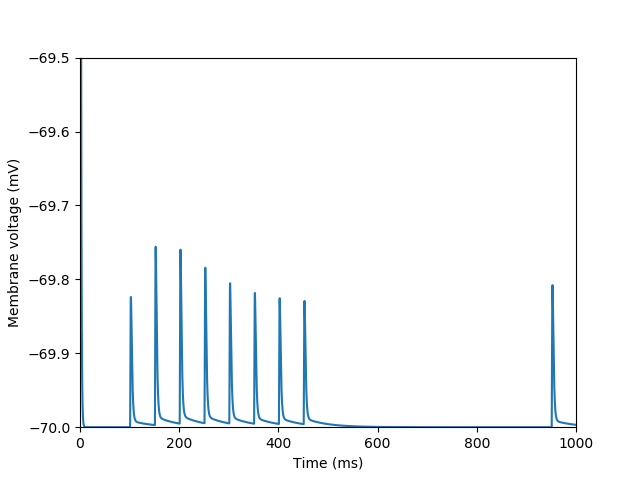

[0, 1000, -70, -69.5]

In [21]:
# This command gives us fancy interactive inline plots
%matplotlib notebook

def plot_timecourse(time_array, dependent_var, newfigure=True, show=True, label=None, ylabel='Membrane voltage (mV)', constants=[]):
    """Convenience function to plot time courses of dependent variables"""
    if newfigure:
        plt.figure()
    plt.plot(time_array, dependent_var, label=label)
    for constant in constants:
        plt.plot(time_array, constant*numpy.ones(len(time_array)))
    plt.xlabel('Time (ms)')
    plt.ylabel(ylabel)
    if show:
        plt.show()
        
plot_timecourse(time, v_soma)
plt.axis([0, 1000, -70, -69.5])

<IPython.core.display.Javascript object>


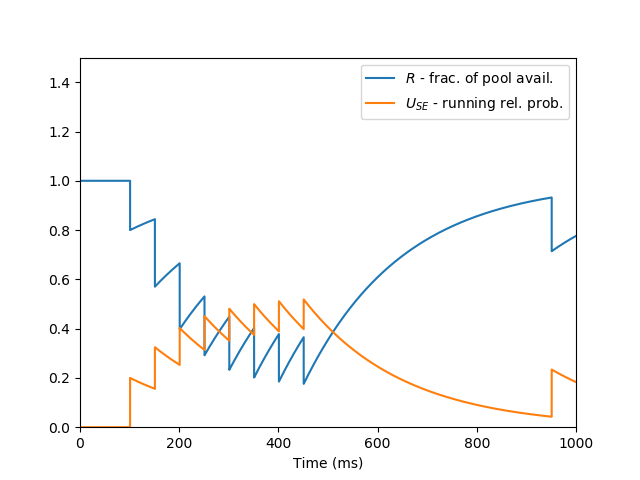

<IPython.core.display.Javascript object>


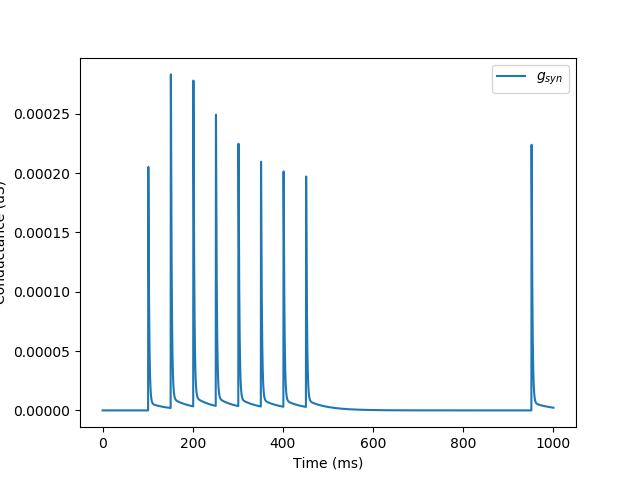

In [22]:
plot_timecourse(time, R_syn, ylabel="", label="$R$ - frac. of pool avail.")
plot_timecourse(time, Use_syn, ylabel="", label="$U_{SE}$ - running rel. prob.", newfigure=False)
plt.legend()
plt.axis([0,1000,0,1.5])
plot_timecourse(time, g_syn, ylabel="Conductance (uS)", label="$g_{syn}$")
plt.legend()

## Exercise 

To submit answers to these questions and get feedback, please return to the edX platform.  

**Question 1**

Now, let's configure another parameter regime, as given below.  Simulate and plot the result.  Is this a E1 (facilitating), E2 (depressing), or E3 (pseudo-linear) synapse dynamics type, and why? 

In [18]:
synapse.U1 = 0.7 # Baseline release probability
synapse.tau_rec = 500 # ms - recovery from depression
synapse.tau_facil = 15 # ms - relaxation from facilitation

neuron.h.run()

0.0

<IPython.core.display.Javascript object>


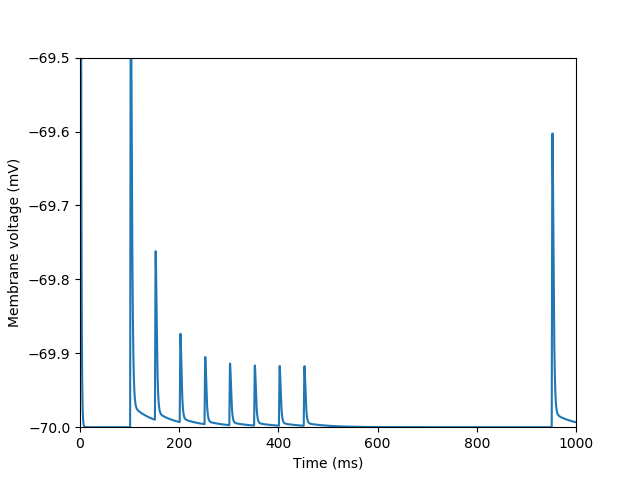

<IPython.core.display.Javascript object>


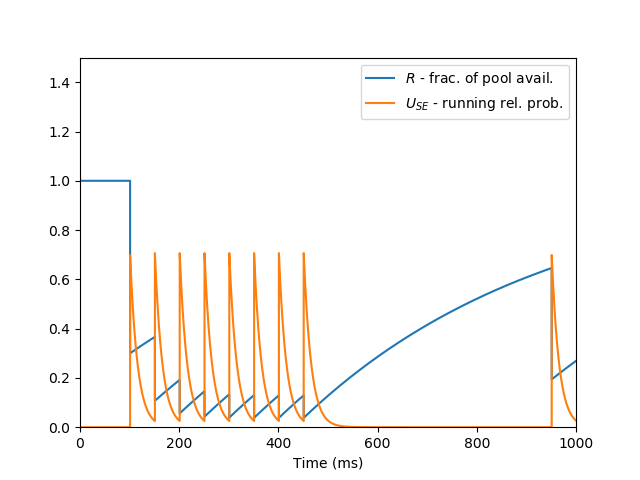

<IPython.core.display.Javascript object>


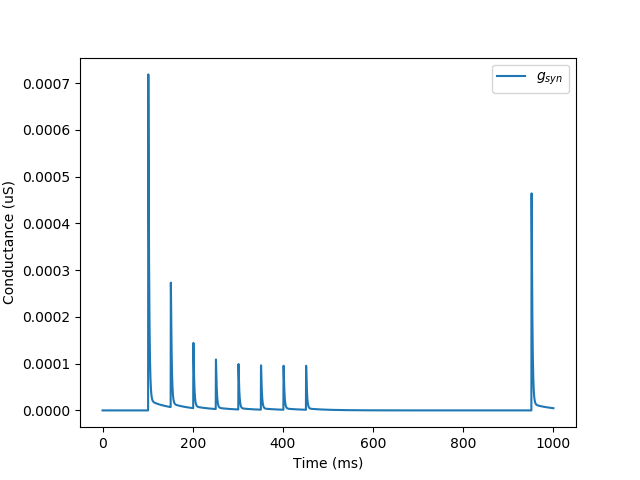

In [19]:
%matplotlib notebook
 
plot_timecourse(time, v_soma)
plt.axis([0, 1000, -70, -69.5])
 
plot_timecourse(time, R_syn, ylabel="", label="$R$ - frac. of pool avail.")
plot_timecourse(time, Use_syn, ylabel="", label="$U_{SE}$ - running rel. prob.", newfigure=False)
plt.legend()
plt.axis([0,1000,0,1.5])
plot_timecourse(time, g_syn, ylabel="Conductance (uS)", label="$g_{syn}$")
plt.legend()
 
# This parameterization of the TM model is depressing (E2), as can be
# seen by the progressive depletion of R, and lack of accumulation of Use.
 


**Question 2**

Now, let's configure another parameter regime, as given below.  Simulate and plot the result. Is this a E1 (facilitating), E2 (depressing), or E3 (pseudo-linear) synapse dynamics type, and why?

In [13]:
synapse.U1 = 0.05 # Baseline release probability
synapse.tau_rec = 50. # ms - recovery from depression
synapse.tau_facil = 500. # ms - relaxation from facilitation

neuron.h.run()

0.0

<IPython.core.display.Javascript object>


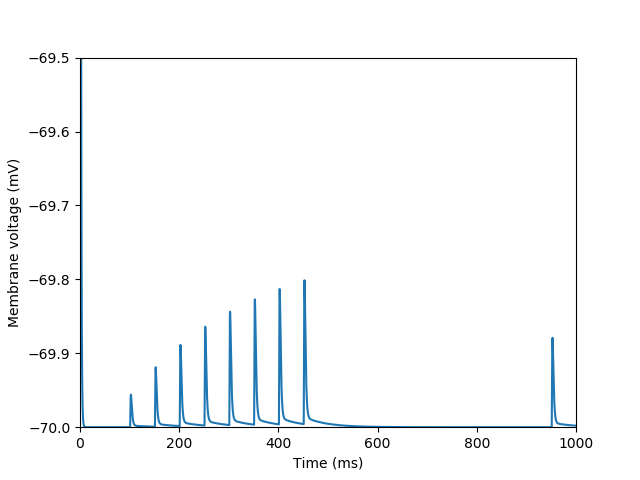

<IPython.core.display.Javascript object>


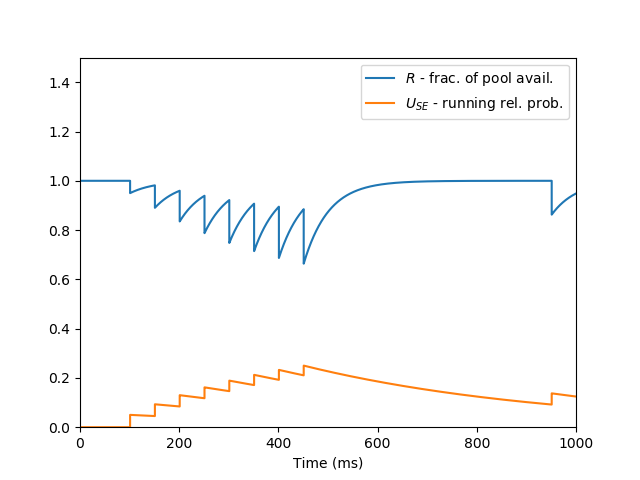

<IPython.core.display.Javascript object>


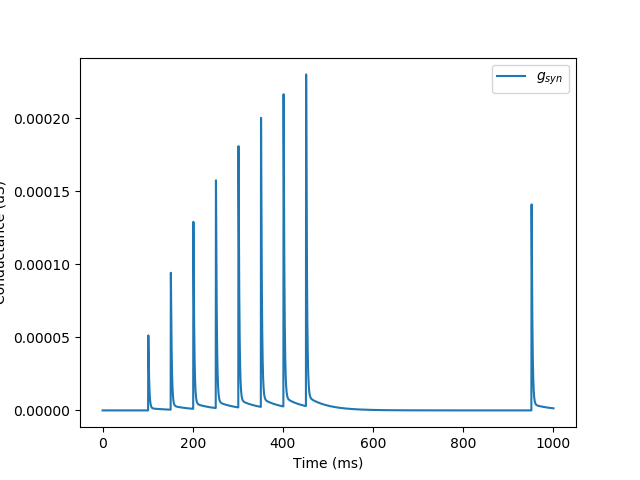

In [14]:
%matplotlib notebook
 
plot_timecourse(time, v_soma)
plt.axis([0, 1000, -70, -69.5])
 
plot_timecourse(time, R_syn, ylabel="", label="$R$ - frac. of pool avail.")
plot_timecourse(time, Use_syn, ylabel="", label="$U_{SE}$ - running rel. prob.", newfigure=False)
plt.legend()
plt.axis([0,1000,0,1.5])
plot_timecourse(time, g_syn, ylabel="Conductance (uS)", label="$g_{syn}$")
plt.legend()
 
# This parameterization of the TM model is facilitating (E1), as can be
# seen by the limited depletion of R, and strong accumulation of Use.